<a href="https://colab.research.google.com/github/malraharsh/Trading-with-Deep-Learning/blob/L-2/DLF_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !git clone https://github.com/PacktPublishing/Hands-On-Deep-Learning-for-Finance.git

In [0]:
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.

import pandas as pd
import numpy as np

In [64]:
file = 'african_crises.csv'
df = pd.read_csv(file)
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [65]:
crisis_dict = {'crisis': 1, 'no_crisis': 0}
df['banking_crisis'] = df['banking_crisis'].replace(crisis_dict)
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


In [0]:
df.drop(columns=['cc3', 'country'], inplace=True)

In [0]:
from sklearn import preprocessing

temp = df['banking_crisis']
df = pd.DataFrame(preprocessing.scale(df), columns=df.columns)
df['banking_crisis'] = temp

In [0]:
X = df.drop(columns=['banking_crisis'])
y = df['banking_crisis']

In [0]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2,shuffle=True)

In [0]:
inp_shape = train_x.loc[0].shape[0]

model = Sequential()
model.add(Dense(64, input_dim=inp_shape, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [82]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = model.fit(train_x, 
          train_y,
          validation_split=0.2,
          batch_size=64,
          epochs=16,
          verbose=2)

Epoch 1/16
11/11 - 0s - loss: 0.0630 - accuracy: 0.9838 - val_loss: 0.1385 - val_accuracy: 0.9647
Epoch 2/16
11/11 - 0s - loss: 0.0621 - accuracy: 0.9838 - val_loss: 0.1425 - val_accuracy: 0.9647
Epoch 3/16
11/11 - 0s - loss: 0.0609 - accuracy: 0.9838 - val_loss: 0.1434 - val_accuracy: 0.9647
Epoch 4/16
11/11 - 0s - loss: 0.0602 - accuracy: 0.9838 - val_loss: 0.1449 - val_accuracy: 0.9647
Epoch 5/16
11/11 - 0s - loss: 0.0594 - accuracy: 0.9838 - val_loss: 0.1480 - val_accuracy: 0.9647
Epoch 6/16
11/11 - 0s - loss: 0.0581 - accuracy: 0.9838 - val_loss: 0.1470 - val_accuracy: 0.9647
Epoch 7/16
11/11 - 0s - loss: 0.0580 - accuracy: 0.9838 - val_loss: 0.1474 - val_accuracy: 0.9647
Epoch 8/16
11/11 - 0s - loss: 0.0568 - accuracy: 0.9838 - val_loss: 0.1514 - val_accuracy: 0.9647
Epoch 9/16
11/11 - 0s - loss: 0.0558 - accuracy: 0.9838 - val_loss: 0.1509 - val_accuracy: 0.9647
Epoch 10/16
11/11 - 0s - loss: 0.0555 - accuracy: 0.9838 - val_loss: 0.1553 - val_accuracy: 0.9647
Epoch 11/16
11/11 -

In [89]:
score = model.evaluate(test_x, test_y);
print(score[1]*100, '%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9811
98.11320900917053 %


In [95]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
import matplotlib.pyplot as plt

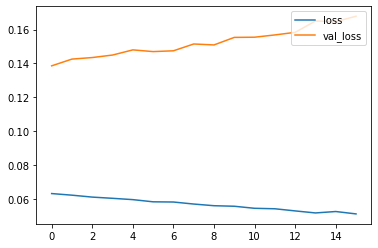

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()